<a href="https://colab.research.google.com/github/TeoLeQuantique/Higgs-Boson-Classification/blob/main/Higgs_Boson_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Higgs Boson Classification
This project focuses on applying machine learning principles to a real-world physics challenge, specifically the classification of high-energy physics events.

Utilizing a dataset from a past CERN challenge (specifically, the ATLAS Education Group's simplified datasets for Higgs boson search in the $\tau\tau$ channel, available on CERN Open Data), the primary objective is to develop a robust machine learning classifier capable of distinguishing between 'Signal' events – indicative of a Higgs boson decaying into two tau particles – and 'Background' events, which are similar-looking noise generated by other known physical processes like Z bosons, top quarks, and W bosons.

**Dataset Details:**
This dataset consists of Monte Carlo simulated events, featuring both low-level (e.g., particle momentum, angular information, missing transverse energy) and high-level (manually constructed based on physical insights like invariant mass) features. These features are designed to help differentiate between signal and background events. While specific simplified samples vary, such datasets can contain millions of simulated collision events and are often nearly class-balanced.

My aim is to demonstrate practical machine learning knowledge by tackling this complex classification problem, with the broader goal of showcasing my work to a wider audience and receiving constructive feedback to further refine the approach.

## Chapter 2: Data Exploration

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas vel hendrerit dui. Maecenas gravida est odio, vel scelerisque orci pharetra vel. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae; Curabitur mi felis, feugiat eget libero vel, viverra convallis nisl. Maecenas vel ullamcorper turpis, et porta nisi. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Phasellus molestie aliquet ipsum, quis consequat justo. Duis tempus ipsum ut gravida dictum. Phasellus maximus mattis libero ut pulvinar. Aliquam tristique est eu nibh pharetra, ut condimentum nunc ultricies. Sed elementum augue id consectetur porttitor.

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

#  We set csv_path to the file location in Drive
csv_path = '/content/drive/MyDrive/Classification/atlas-higgs-challenge-2014-v2.csv'


# #Initialise libraries
import os
import pandas as pd

assert os.path.exists(csv_path), f"CSV not found at {csv_path}. Please upload or correct the path."

data = pd.read_csv(csv_path)

data.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818238 entries, 0 to 818237
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      818238 non-null  int64  
 1   DER_mass_MMC                 818238 non-null  float64
 2   DER_mass_transverse_met_lep  818238 non-null  float64
 3   DER_mass_vis                 818238 non-null  float64
 4   DER_pt_h                     818238 non-null  float64
 5   DER_deltaeta_jet_jet         818238 non-null  float64
 6   DER_mass_jet_jet             818238 non-null  float64
 7   DER_prodeta_jet_jet          818238 non-null  float64
 8   DER_deltar_tau_lep           818238 non-null  float64
 9   DER_pt_tot                   818238 non-null  float64
 10  DER_sum_pt                   818238 non-null  f

In [5]:
## Showing the first 5 rows
data.head(5)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2.150,0.444,46.062,1.24,-2.475,113.497,0.000814,s,t,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,0.725,1.158,-999.000,-999.00,-999.000,46.226,0.681042,b,t,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0.715742,b,t,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,1.660654,b,t,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.904263,b,t,6.245333


**Observations from the first rows:**


* The dataset contains an EventId column that appears to be a unique identifier (*We will not use EventId as a feature*)

* Many numeric columns contain the sentinel value -999. This encodes missing measurements.

* Label contains 's' and 'b' (signal / background) as expected

* There are two weight columns (Weight and KaggleWeight) with very different magnitudes

* Values like -0.000 appear in some numeric columns. This is not meaningful so these values will be treated as zero

In [6]:
## Showing the basic info for our data
# Showing the shape of our data
print(f"(rows, cols) = {data.shape}\n")

# Checking how are classes distributed
label_counts = data['Label'].value_counts(dropna=False)
label_percent = data['Label'].value_counts(normalize=True, dropna=False) * 100
label_df = pd.DataFrame({'Counts': label_counts, 'Percent (%)': label_percent.round(4)})
print("Label distribution:")
print(label_df)
print("\n")

# Checking KaggleSet distribution (train/test/unknown)
print("KaggleSet distribution:")
print(data['KaggleSet'].value_counts(dropna=False))
print("\n")

# EventId uniqueness check
n_rows = len(data)
n_unique_eventid = data['EventId'].nunique()
n_duplicates = n_rows - n_unique_eventid

print("EventId check:")
print(f"Rows: {n_rows:,}")
print(f"Unique EventId: {n_unique_eventid:,}")
print(f"Duplicate EventId: {n_duplicates:,}")
print("")

# Count -999. occurrences and true NaNs for each column
hidden_nulls = (data == -999.0).sum()
hidden_pct = (hidden_nulls / n_rows * 100).round(2)
true_nans = data.isna().sum()
true_nans_pct = (true_nans / n_rows * 100).round(2)

report = pd.DataFrame({
    'Column': data.columns,
    '-999_count': hidden_nulls.values,
    '-999_pct': hidden_pct.values,
    'NaN_count': true_nans.values,
    'NaN_pct': true_nans_pct.values
})

# Keep only columns that have either -999 or true NaNs, sorted by highest -999 percentage
report = report[(report['-999_count'] > 0) | (report['NaN_count'] > 0)]
report = report.sort_values(by='-999_pct', ascending=False).reset_index(drop=True)

print("----- Missing-value (-999.) and NaN summary -----")
if report.empty:
    print("No -999 or NaN values found.")
else:
    print(report.to_string(index=False))


# We check for duplicate rows
# Count duplicate rows
num_duplicates = data.duplicated().sum()

print(f"Duplicate rows: {num_duplicates}")
print(f"Percent duplicate: {num_duplicates/len(data)*100:.2f}%\n")

(rows, cols) = (818238, 35)

Label distribution:
       Counts  Percent (%)
Label                     
b      538678      65.8339
s      279560      34.1661


KaggleSet distribution:
KaggleSet
v    450000
t    250000
b    100000
u     18238
Name: count, dtype: int64


EventId check:
Rows: 818,238
Unique EventId: 818,238
Duplicate EventId: 0

----- Missing-value (-999.) and NaN summary -----
                Column  -999_count  -999_pct  NaN_count  NaN_pct
  DER_deltaeta_jet_jet      580253     70.91          0      0.0
      DER_mass_jet_jet      580253     70.91          0      0.0
   DER_prodeta_jet_jet      580253     70.91          0      0.0
PRI_jet_subleading_phi      580253     70.91          0      0.0
DER_lep_eta_centrality      580253     70.91          0      0.0
PRI_jet_subleading_eta      580253     70.91          0      0.0
 PRI_jet_subleading_pt      580253     70.91          0      0.0
   PRI_jet_leading_eta      327371     40.01          0      0.0
    PRI_jet_leading_p

In [7]:
##
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818238 entries, 0 to 818237
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      818238 non-null  int64  
 1   DER_mass_MMC                 818238 non-null  float64
 2   DER_mass_transverse_met_lep  818238 non-null  float64
 3   DER_mass_vis                 818238 non-null  float64
 4   DER_pt_h                     818238 non-null  float64
 5   DER_deltaeta_jet_jet         818238 non-null  float64
 6   DER_mass_jet_jet             818238 non-null  float64
 7   DER_prodeta_jet_jet          818238 non-null  float64
 8   DER_deltar_tau_lep           818238 non-null  float64
 9   DER_pt_tot                   818238 non-null  float64
 10  DER_sum_pt                   818238 non-null  float64
 11  DER_pt_ratio_lep_tau         818238 non-null  float64
 12  DER_met_phi_centrality       818238 non-null  float64
 13 

In [8]:
## We keep a copy of the data before any removal for safety
data_backup = data.copy()

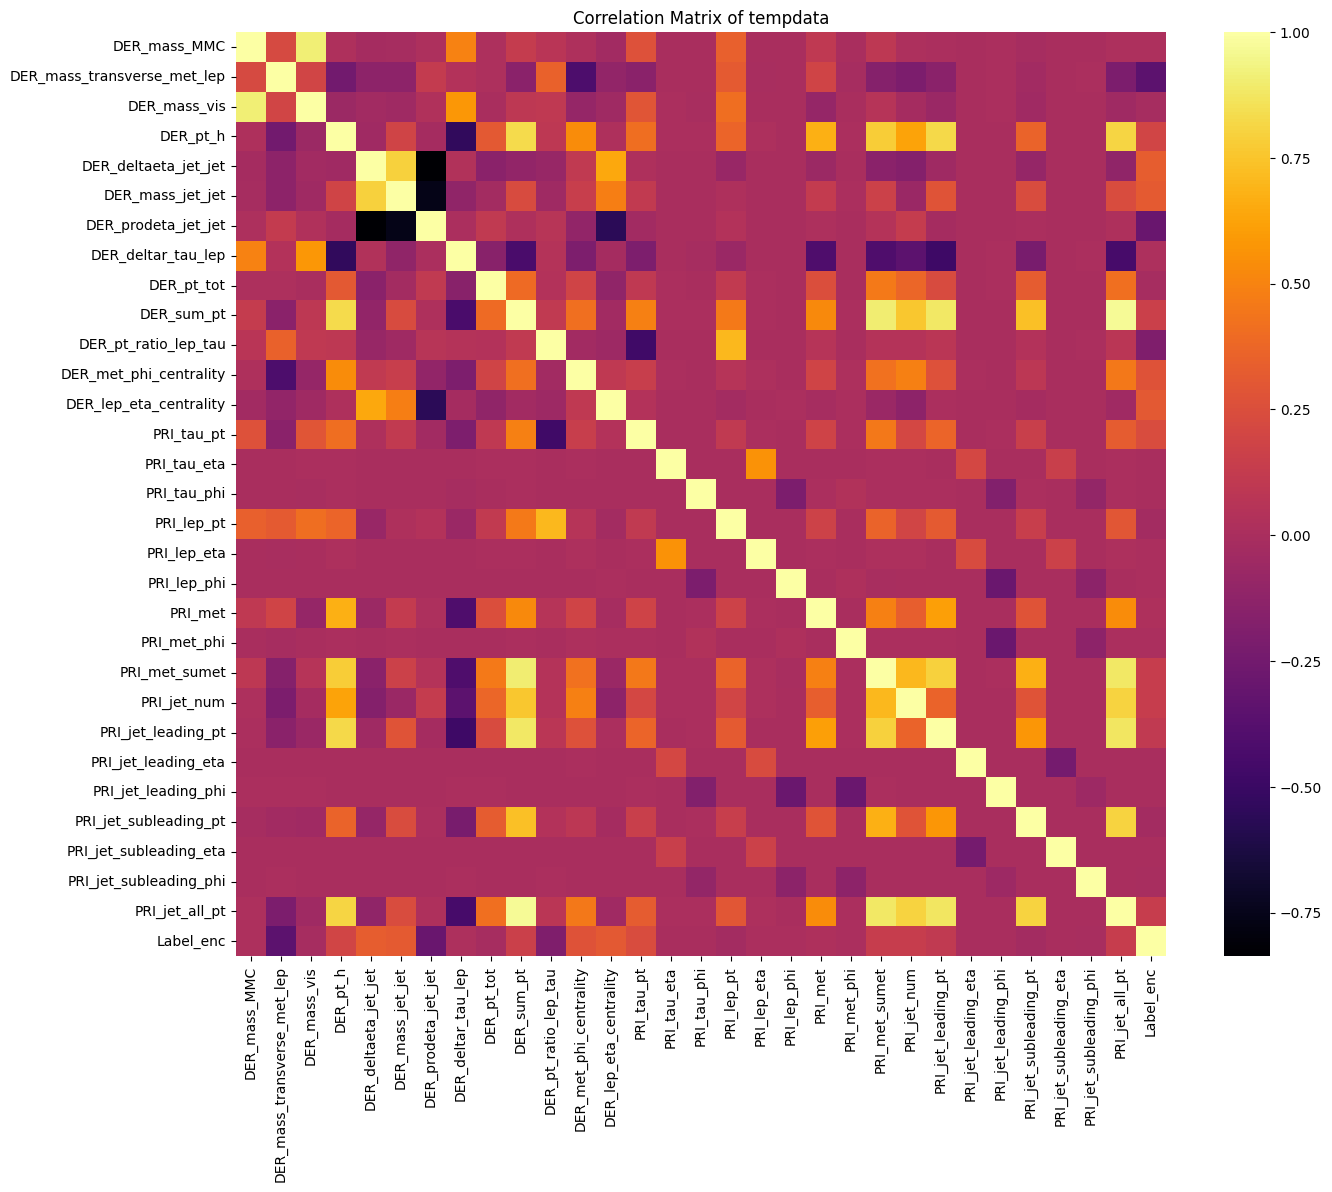

In [9]:
## Checking the correlation of the feutures

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# We exclude the non-physical columns EventId, Weight, KaggleSet
# to avoid spurious correlations and focus only on physics features

# We also replace -999.0 with NaN values to prevent these placeholders
# from treating them as extreme outliers
tempdata = (data.replace(-999.0, np.nan)).filter(regex='^(DER|PRI|Label)')

# We need to convert Labels to numbers so they can be used in the correlation
tempdata['Label_enc'] = tempdata['Label'].map({'s': 1, 'b': 0})

# We delete the 'Label' column to avoid confusing the correlation
tempdata.drop(columns=['Label'], inplace=True)

# Calculating the Correlation matrix
corr_matrix = tempdata.corr()

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=False, cmap='inferno')
plt.title("Correlation Matrix of tempdata")
plt.show()

In [10]:
# We only look at the upper triangle of the matrix to avoid
# printing both (A, B) and (B, A)
high_corr_pairs = [] # Empty list

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        score = (corr_matrix.abs()).iloc[i, j]
        if 0.7 < score < 1.0:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], score))

# Sort the pairs by the highest correlation first
high_corr_pairs.sort(key=lambda x: x[2], reverse=True)

# Print the results
print(f"{'Feature 1':<25} | {'Feature 2':<25} | {'Correlation':<10}")
print("-" * 65)
for f1, f2, score in high_corr_pairs:
    print(f"{f1:<25} | {f2:<25} | {score:.4f}")

print(f"\nTotal pairs found: {len(high_corr_pairs)}")

Feature 1                 | Feature 2                 | Correlation
-----------------------------------------------------------------
DER_sum_pt                | PRI_jet_all_pt            | 0.9657
DER_mass_MMC              | DER_mass_vis              | 0.9127
DER_sum_pt                | PRI_met_sumet             | 0.9051
PRI_met_sumet             | PRI_jet_all_pt            | 0.8848
DER_sum_pt                | PRI_jet_leading_pt        | 0.8788
PRI_jet_leading_pt        | PRI_jet_all_pt            | 0.8780
DER_deltaeta_jet_jet      | DER_prodeta_jet_jet       | 0.8365
DER_pt_h                  | DER_sum_pt                | 0.8333
DER_pt_h                  | PRI_jet_leading_pt        | 0.8251
DER_pt_h                  | PRI_jet_all_pt            | 0.8083
PRI_jet_num               | PRI_jet_all_pt            | 0.8033
PRI_jet_subleading_pt     | PRI_jet_all_pt            | 0.8000
DER_deltaeta_jet_jet      | DER_mass_jet_jet          | 0.7969
PRI_met_sumet             | PRI_jet_leading_pt 

**Comments - Notes**

We can notice so far that there are 818238 events and 35 colums in total.

We see two datatypes:

* Numerical (float64/int64): 33 columns are numbers.

* Categorical (object): 2 columns (Label and KaggleSet) are text/strings.

Only 30 of colums are our features while the rest five are the label, the inentifier of the events and 2 columns that refer to Weights & Metadata from kaggle.

There no null entries in our data. But we check for "hidden" missing values as -999.0. Pandas sees -999.0 as a valid number, so it doesn't count it as a "Null".

We also notce that our dataset is imbalanced. There are roughly twice as many background events as there are signal events. In particle physics, the signal for the Higgs boson is much rarer than the background noise. This imbalance is actually "fair" as in real life, the ratio is even more extreme.

In order to move in more detail analysis, we need to understand the 4 levels of your features.

---

**Nominal**

***Label***, ***KaggleSet***, ***EventId***

**Label** (s/b) is a name

**EventId** is a number but acts as a name. Adding two IDs would be meaningless.


---

**Ordinal**

***PRI_jet_num***

There is a clear order (0 < 1 < 2 < 3), but the data is maximise at 3, so the distance between 2 and 3 isn't necessarily the same as 1 and 2.

---

**Interval**

***PRI_tau_phi***,
***PRI_lep_phi***, ***PRI_met_phi***, ***PRI_jet_leading_phi***

***PRI_jet_subleading_phi***, ***PRI_tau_eta***, ***PRI_lep_eta***

***PRI_jet_leading_eta***, ***PRI_jet_subleading_eta***

***DER_met_phi_centrality***, ***DER_lep_eta_centrality***

Angles (ϕ) and Coordinates (η) have equal intervals, but the ""Zero"" is arbitrary. For example 0 radians is just a direction, not an absence of angle.

---

**Ratio**

***DER_mass_MMC***, ***DER_mass_transverse_met_lep***, ***DER_mass_vis***

***DER_pt_h***, ***DER_deltaeta_jet_jet***, ***DER_mass_jet_jet***

***DER_prodeta_jet_jet***, ***DER_deltar_tau_lep, ***DER_pt_tot***

***DER_sum_pt***, ***DER_pt_ratio_lep_tau***, ***PRI_tau_pt***

***PRI_lep_pt***, ***PRI_met***, ***PRI_met_sumet***

***PRI_jet_leading_pt***, ***PRI_jet_subleading_pt***, ***PRI_jet_all_pt***

***Weight***, ***KaggleWeight***

Mass, Momentum (pT​) and Energy have a ""True Zero."" 0 GeV means a particle is at rest or has no mass. You can say 100 GeV is "twice as much" as 50 GeV.


**Data Visualisation**

We already saw that some data pairs are corralated a lot. But correlation doesnt give us the predictive power. So now we have to comper some features with our labels.

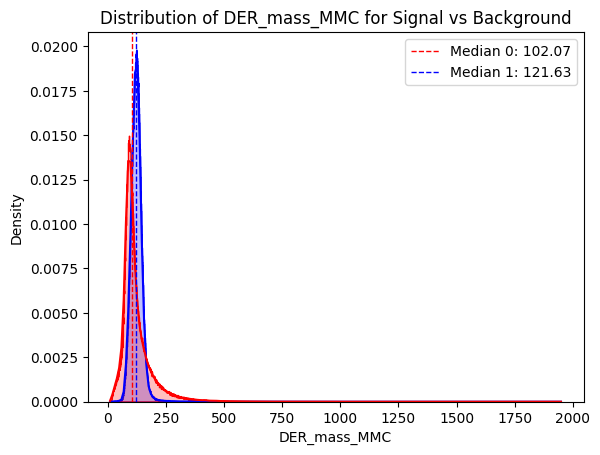

In [11]:
## We will start by defining a function that makes a comparative histrogram

def comparative_histogram(dt, feature_name):
    """
    Creates a comparative histogram and KDE to compare signal and background distributions.
    """
    # Calculation of medians
    medians = dt.groupby('Label_enc')[feature_name].median()

    # Plotting histogram
    sns.histplot(
    data=dt,
    x=feature_name,
    hue='Label_enc',        # Groups data by label
    kde=True,               # Plots a Kernel Density Estimate curve to show the distribution shape
    element="step",         # Prevents overlapping bars from hiding each other
    stat="density",         # Normalizes the counts so that the total area = 1
    common_norm=False,      # Normalizes each class independently
    palette=['red', 'blue'] # Red for Background (0) and Blue for Signal (1)
    )

    # Plotting median lines
    colors = {0: 'red', 1: 'blue'}
    for label, value in medians.items():
        plt.axvline(value, color=colors[label], linestyle='--', linewidth=1,
                    label=f'Median {label}: {value:.2f}')

    plt.title(f'Distribution of {feature_name} for Signal vs Background')
    plt.xlabel(feature_name)
    plt.ylabel('Density')
    plt.legend()

# We will apply this function for DER_mass_MMC because is a particle that has mass (125GeV/c^2)
comparative_histogram(tempdata, 'DER_mass_MMC')

**Notes**

Feature ***`DER_mass_MMC`*** shows a visible separation in central tendency between Signal and Background. The Signal distribution (blue) is more concentrated, whereas the Background (red) is more dispersed, which means that this feature is a strong candidate for model training. The use of a Kernel Density Estimate (KDE) allows us to see the peak of the Signal clearly. We notice that his peak aligns with the expected mass region of the Higgs boson (125 GeV/c^2).

Also there is a notable gap between the Signal Median and the Background Median which suggests that the feature captures a physical difference in the event types, reducing the uncertainty of the classification.

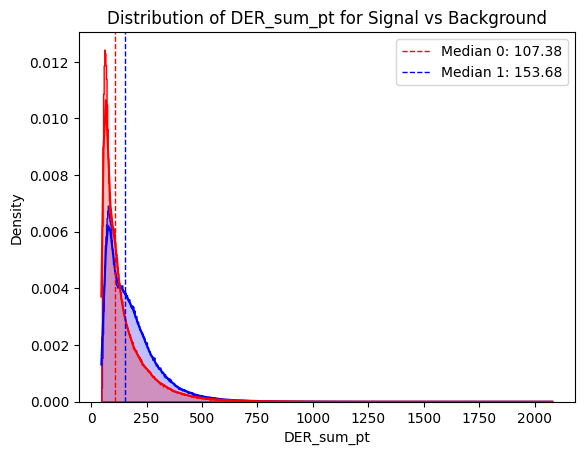

In [12]:
# Same for DER_sum_pt
comparative_histogram(tempdata, 'DER_sum_pt')

**Notes**

In the distribution of ***`DER_sum_pt`***. We observe a significant shift in the medians, with the Signal median (153.68) being substantially higher than the Background median (107.38). While both features exhibit heavy-tailed distributions, the Signal maintains a higher density in the high-momentum regime. This visual evidence supports the inclusion of energy-sum features in our multivariate model, as they provide a different 'signature' than the mass-based features.

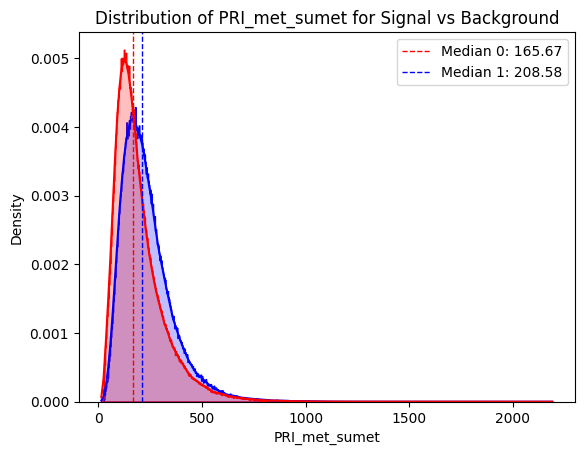

In [13]:
# Same for PRI_met_sumet
comparative_histogram(tempdata, 'PRI_met_sumet')

**Notes**


The analysis of `PRI_met_sumet` confirms a clear distributional shift between classes. The Signal median (208.58) is noticeably higher than the Background median (165.67), providing further evidence of class discriminability. While the Background events are tightly clustered at lower energy levels, the Signal exhibits a broader distribution with a higher density in the upper energy range. This variable effectively complements mass-based features by capturing the energy profile of the event, thereby reducing classification uncertainty.


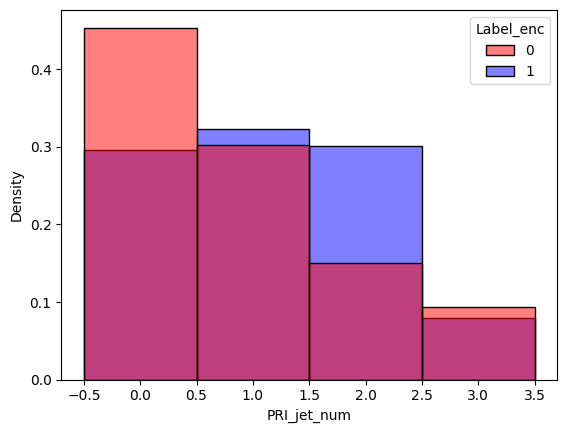

In [14]:
# PRI_jet_num is ordinal so we will use a histogram to see in which
# number of jets that higgs signal is greater
sns.histplot(data=tempdata, x='PRI_jet_num', hue='Label_enc',
             element="bars", stat="density", discrete=True,
             common_norm=False, palette=['red', 'blue'])
plt.xlabel('PRI_jet_num')
plt.ylabel('Density')
plt.show()

**Notes**

The histogram for ***`PRI_jet_num`*** provides a clear visualization of class preferences. Background events are heavily concentrated in the 0-jet category, while the Signal events show a higher relative density in the 2 and 3 jet categories. By using a discrete bar representation with independent density normalization, we accurately capture the probability mass function of each class, highlighting that jet production is a significant feature for separating the Higgs signal from background noise.

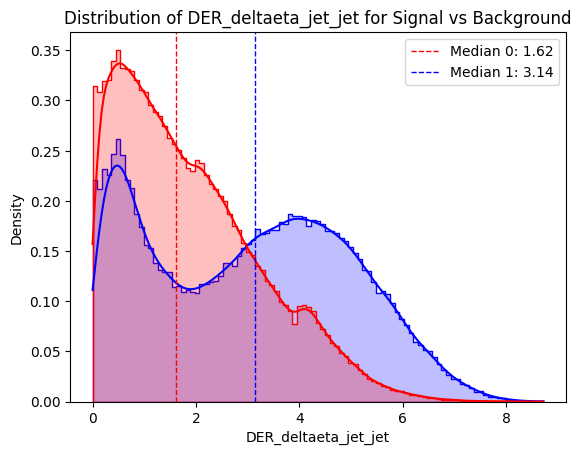

In [15]:
# Same for DER_deltaeta_jet_jet
comparative_histogram(tempdata, 'DER_deltaeta_jet_jet')

**Notes**

The distribution of ***`DER_deltaeta_jet_jet`*** provides a highly distinctive feature for class separation. We observe a bimodal distribution in the Signal (blue), with a secondary prominent peak around 4.0, which is absent in the Background (red). This leads to a dramatic shift in the medians (3.14 for Signal vs. 1.62 for Background). The separation in the high-values suggests that this angular feature is a critical discriminator, as it captures a unique geometric signature of the Higgs boson decay that significantly deviates from the background noise profile.

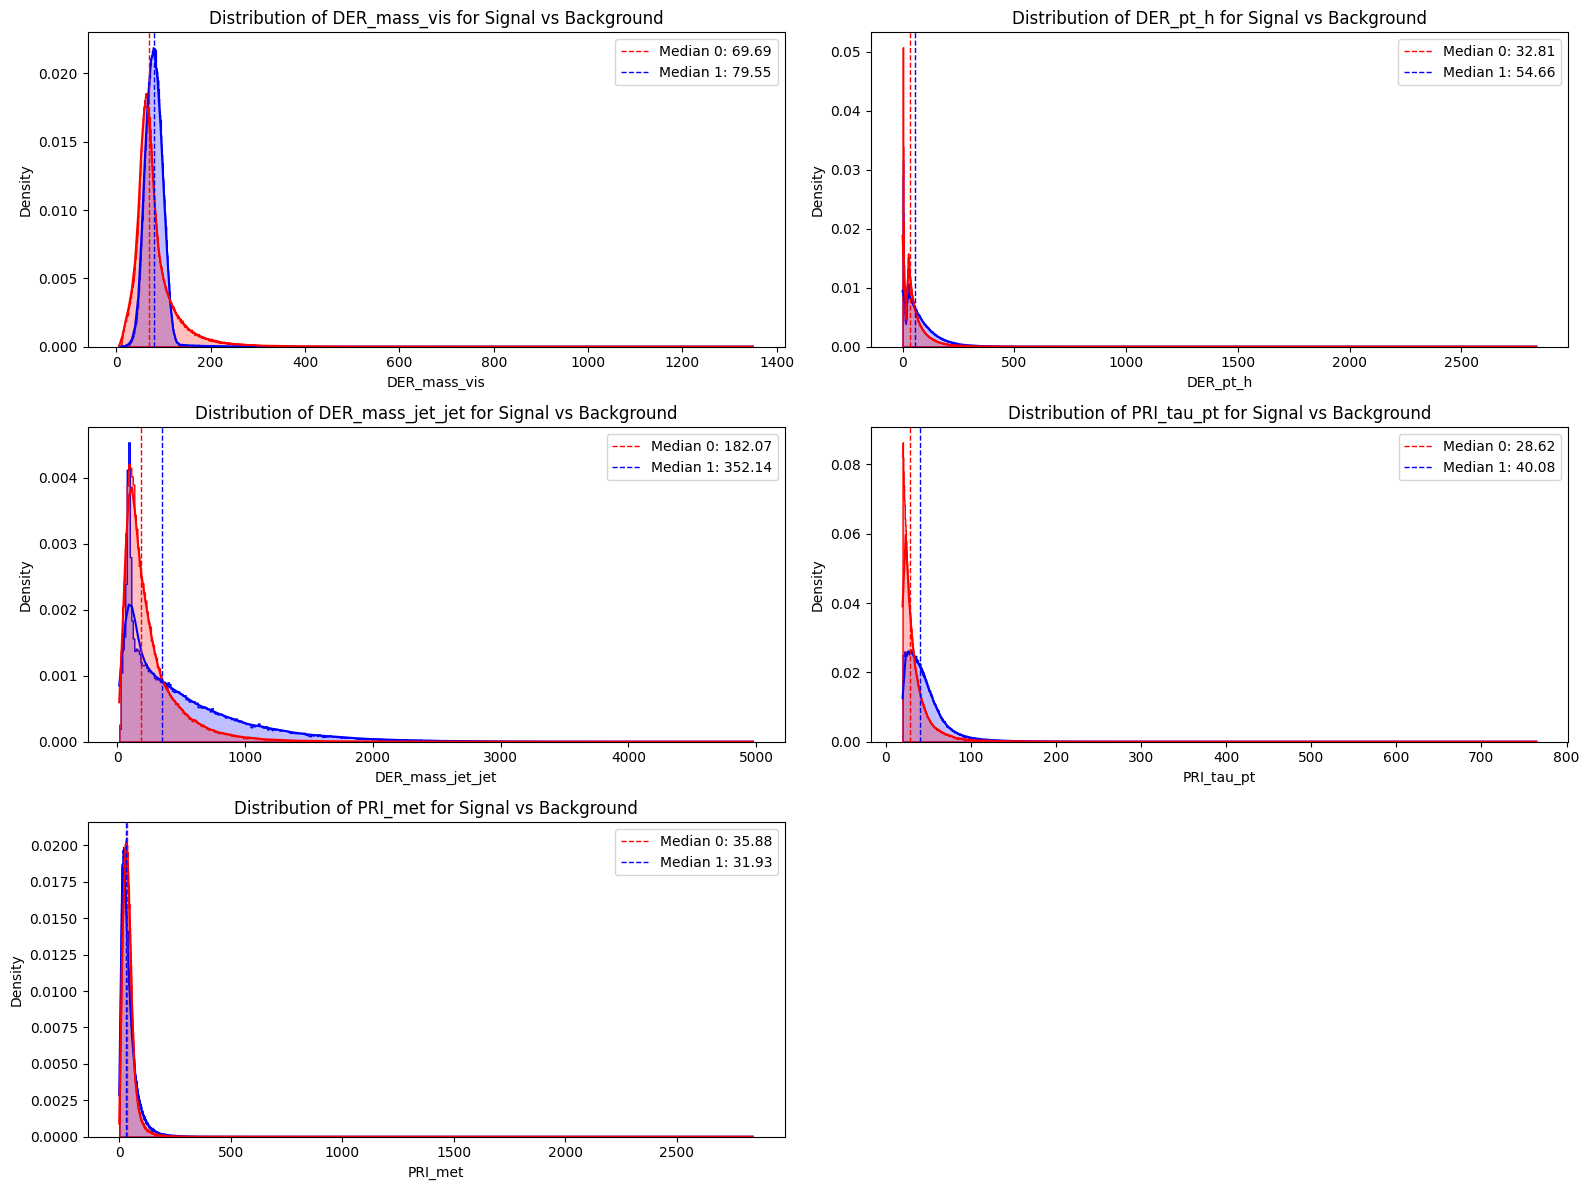

In [16]:
## Same for the selected features
selected_features = ['DER_mass_vis', 'DER_pt_h', 'DER_mass_jet_jet', 'PRI_tau_pt', 'PRI_met']

# plotting
plt.figure(figsize=(16, 12))

for i, feature in enumerate(selected_features):
    plt.subplot(3, 2, i + 1)
    comparative_histogram(tempdata, feature)

plt.tight_layout()
plt.show()

**Notes**
1. The visible mass `DER_mass_vis` exhibits a classic resonant behavior for the Signal, with a sharp concentration and median shift toward higher values (79.55 vs 69.69).
Also, a more dramatial separation happens in `DER_mass_jet_jet` which shows a massive separation between background and signal. The Signal median (352.14) is nearly double that of the Background (182.07). This indicates that Higgs events are characterized by 2-jet systems, likely made by Vector Boson Fusion (where two quarks radiate heavy W or Z bosons which interact to produce a particle such as higgs)

2. `PRI_met `shows the least amount of discriminability in this set, with medians that are nearly identical (31.93 vs 35.88)

In [17]:
## Here are PRI_tau_phi, PRI_lep_phi, PRI_met_phi, and PRI_jet_leading_phi as
# as a polar plot just to see the symetry of the accelarator




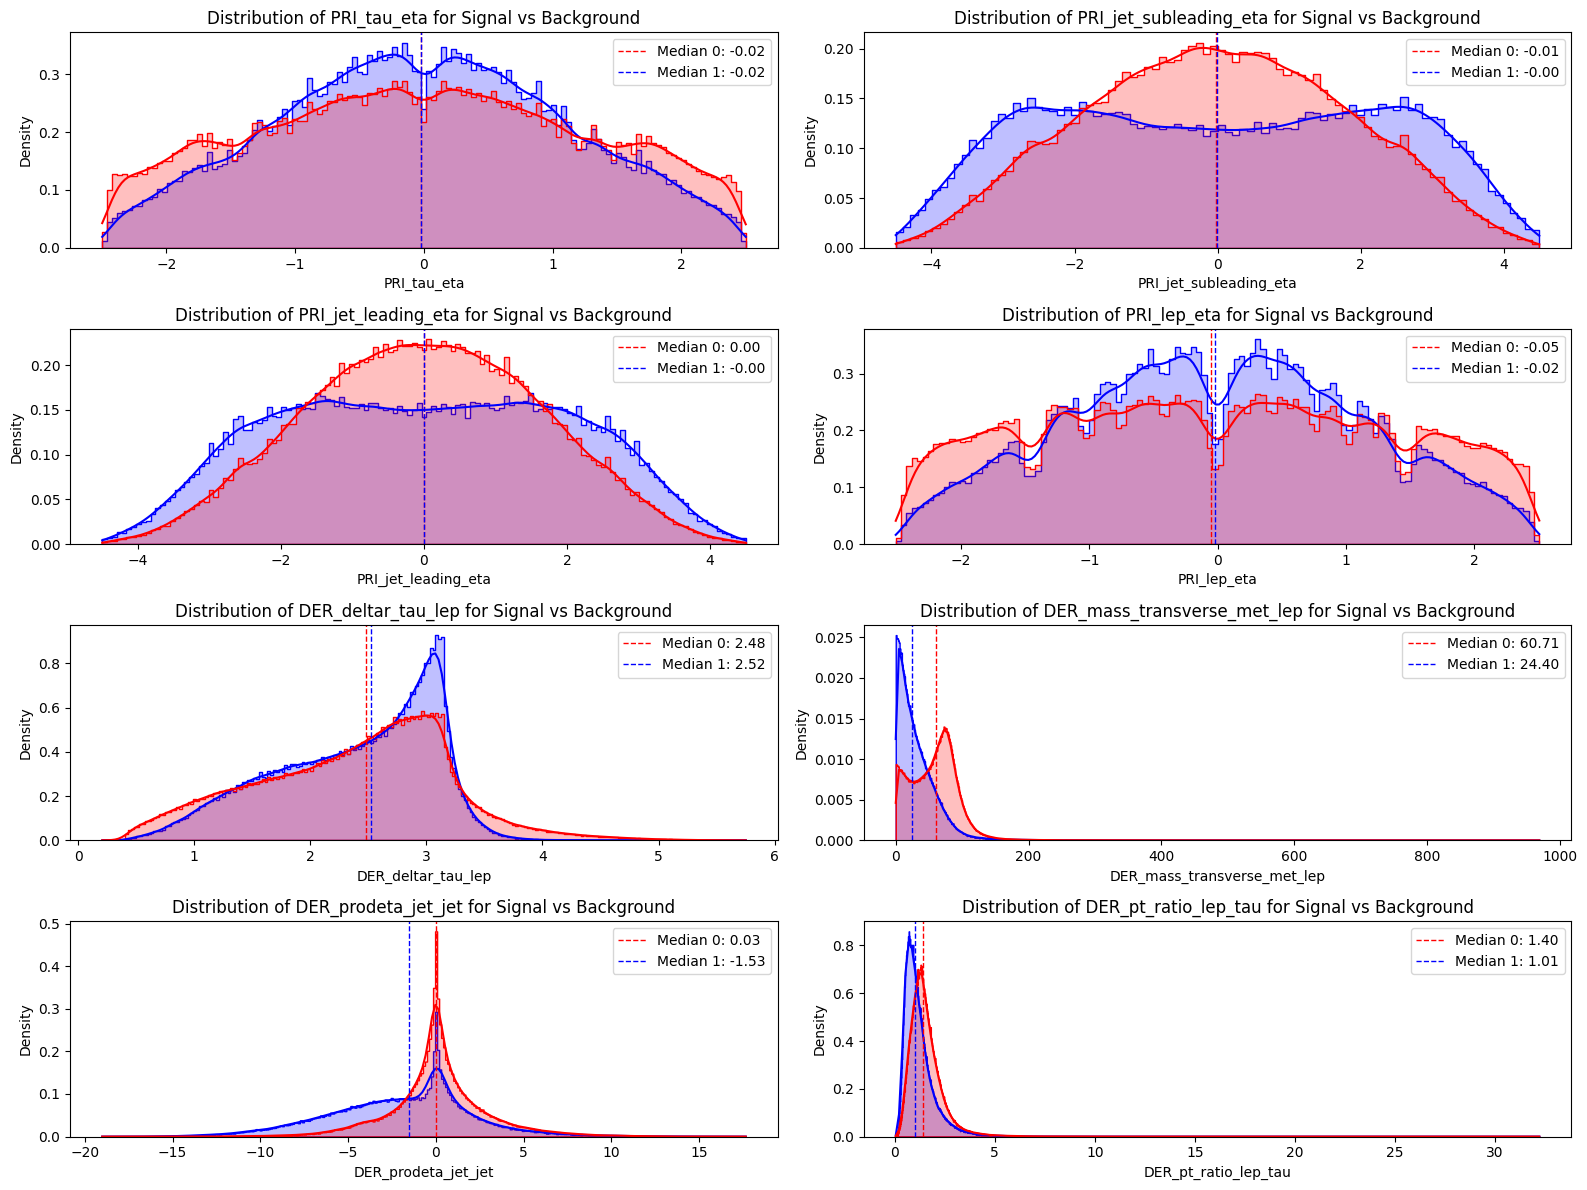

In [18]:
## We will quickly take a look at the rest 15 features

# For the interval features
interval_features = ['PRI_tau_eta', 'PRI_jet_subleading_eta',
                     'PRI_jet_leading_eta', 'PRI_lep_eta',
                     'DER_deltar_tau_lep','DER_mass_transverse_met_lep',
                     'DER_prodeta_jet_jet','DER_pt_ratio_lep_tau'
                     ]

# plotting
plt.figure(figsize=(16, 12))

for i, feature in enumerate(interval_features):
    plt.subplot(4, 2, i + 1)
    comparative_histogram(tempdata, feature)

plt.tight_layout()
plt.show()



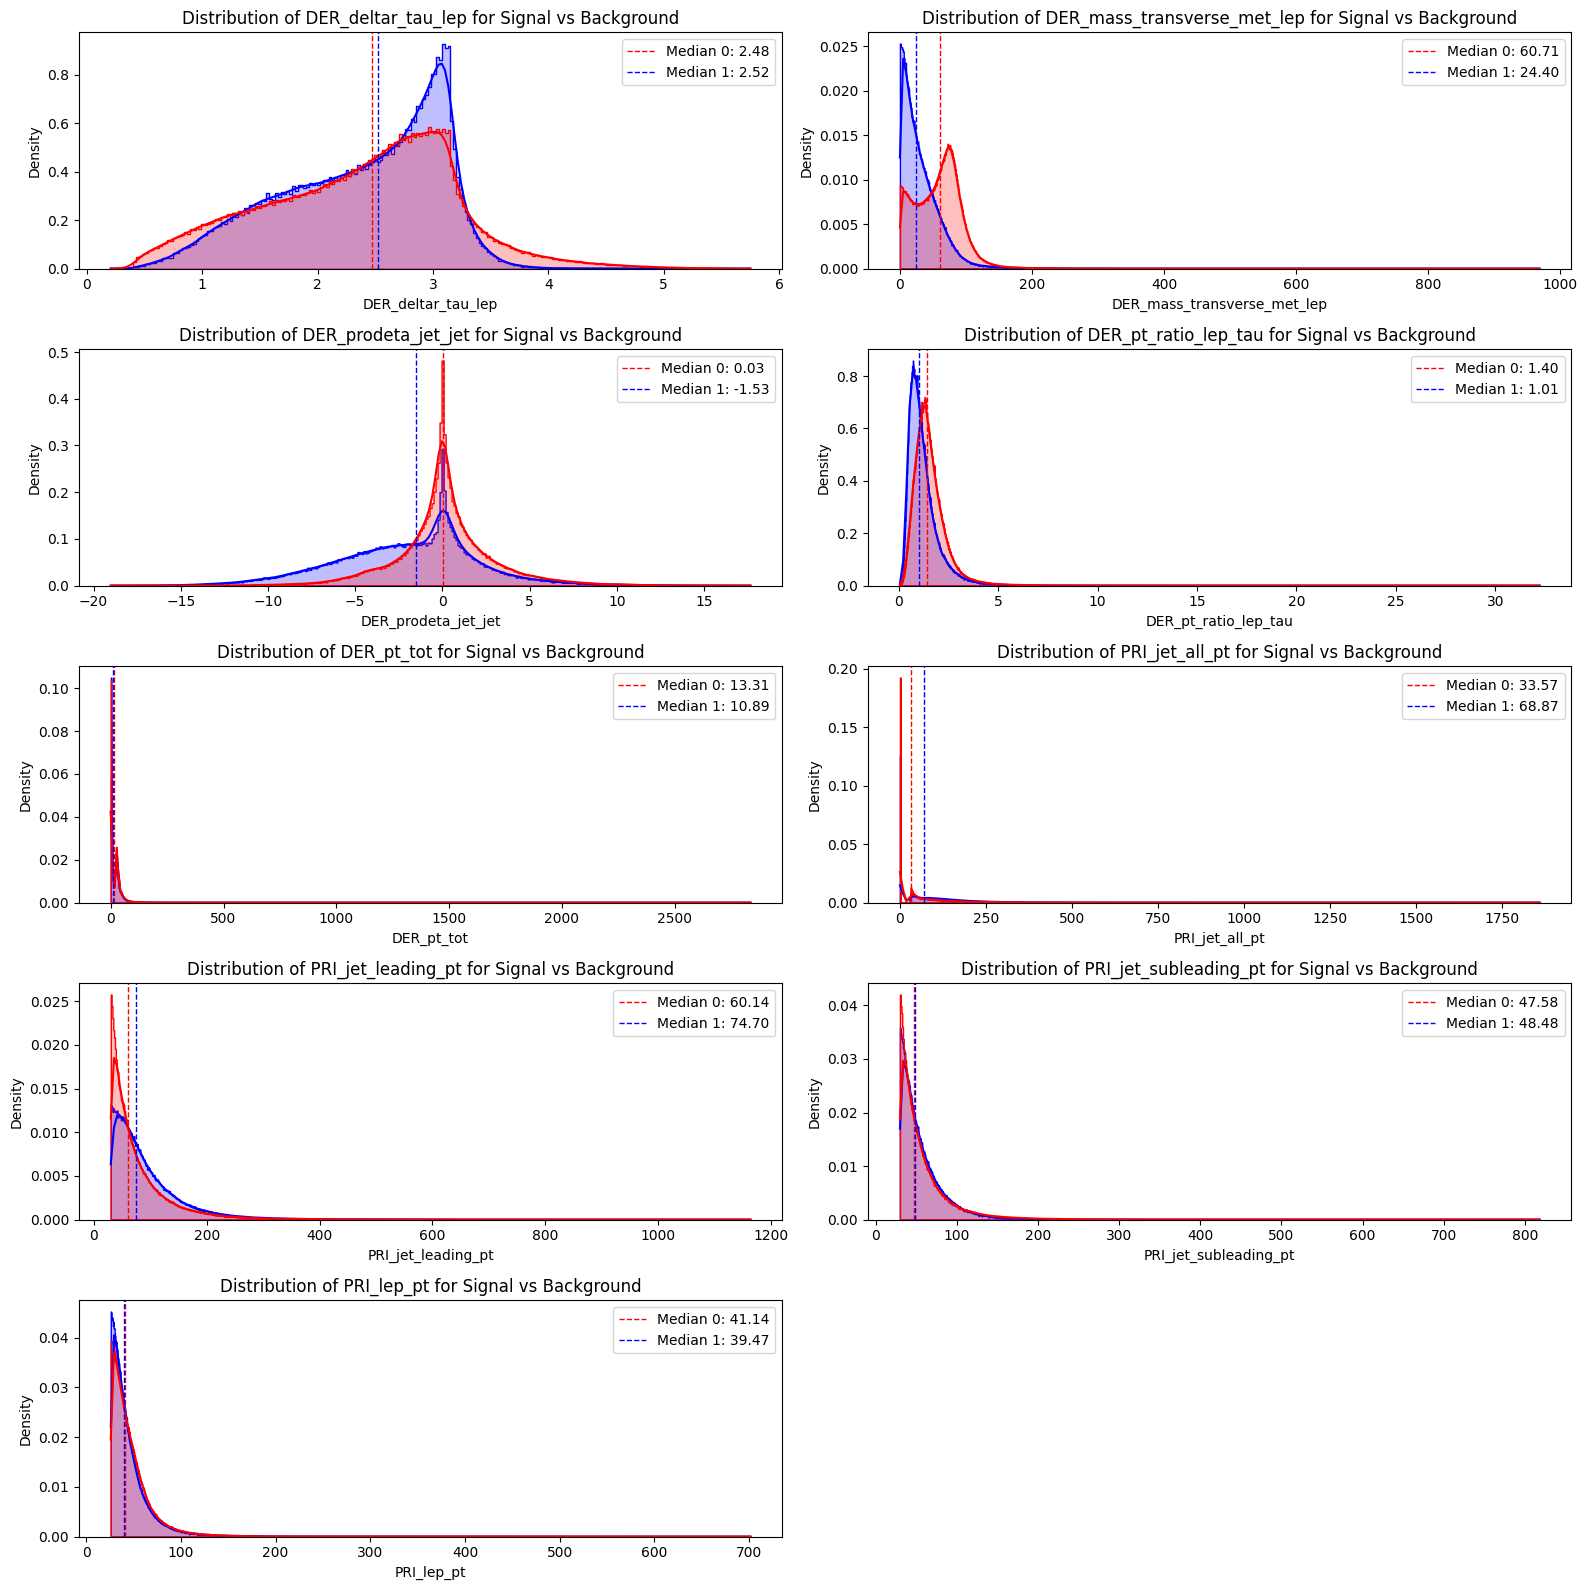

In [19]:
# For the Ratio features
interval_features = ['DER_deltar_tau_lep',
                     'DER_mass_transverse_met_lep',
                     'DER_prodeta_jet_jet',
                     'DER_pt_ratio_lep_tau',
                     'DER_pt_tot',
                     'PRI_jet_all_pt',
                     'PRI_jet_leading_pt', 'PRI_jet_subleading_pt',
                     'PRI_lep_pt'
                     ]


# plotting
plt.figure(figsize=(16, 16))

for i, feature in enumerate(interval_features):
    plt.subplot(5, 2, i + 1)
    comparative_histogram(tempdata, feature)

plt.tight_layout()
plt.show()

## Chapter 3: Feature Engineering and Preprocessing

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas vel hendrerit dui. Maecenas gravida est odio, vel scelerisque orci pharetra vel. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae; Curabitur mi felis, feugiat eget libero vel, viverra convallis nisl. Maecenas vel ullamcorper turpis, et porta nisi. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Phasellus molestie aliquet ipsum, quis consequat justo. Duis tempus ipsum ut gravida dictum. Phasellus maximus mattis libero ut pulvinar. Aliquam tristique est eu nibh pharetra, ut condimentum nunc ultricies. Sed elementum augue id consectetur porttitor.

**Data Cleaning & Feature Engeneering**

Before moving to the training phase, we will need a clean data set. By saying clean, we mean that we will keep only feautres with physical information.

We Separate the dataset into three parts:

X: The features

y: The label

w: The weights (for the evaluation part)

In [26]:
## We extract features that have physcial information
# We define features (X) by dropping metadata and the target
# EventId is just a counter, Weight is for physics significance, Label is the goal

X = data.drop(['EventId', 'Label', 'Weight', 'KaggleSet', 'KaggleWeight'], axis=1)

# targets (y)
y = data['Label']

# We define weights (w) in order to use them later in AMS calculation
weights = data['Weight']

**Data Splitting**

We split our data before the preprossesing part

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, weights, test_size=0.2, random_state=33,
    stratify=y # ensures signal-to-background ratio is the same in both sets
)

print(f"Training set size: {X_train.shape[0]} events")
print(f"Testing set size: {X_test.shape[0]} events")

Training set size: 654590 events
Testing set size: 163648 events


**Preprossing**

We noticed that some features have almost zero predictive power as they have the least discriminability to separate backround and signal.

We  will also build two main pipelines, one for neural  . Each pipeline will have a "Noise Included" and a "Noise Removed" sub-experiment.

In the first pipeline we will use XGBoost classifier as...

in the second we will use a nural network as...

and we will check their acuraccy using linear regression ....

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# We replace -999.0 with NaN
X_train.replace(-999.0, np.nan, inplace=True)
X_test.replace(-999.0, np.nan, inplace=True)


# Now we will define two variations for the NN. One by using strategy='mean'
# and the other by using strategy='median'

# Pipeline 1: Mean Imputation
nn_pipe_mean = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline 2: Median Imputation
nn_pipe_median = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Process the data for both cases
X_train_mean = nn_pipe_mean.fit_transform(X_train)
X_test_mean = nn_pipe_mean.transform(X_test)

X_train_median = nn_pipe_median.fit_transform(X_train)
X_test_median = nn_pipe_median.transform(X_test)



## For XGBoost we do not need a pipeline
X_train_xgb = X_train
X_test_xgb = X_test

**Models**

Here we initallize our models and we are doing a hyperparameter search for better reasualts.

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(300,300,300,300,300),
    activation='relu',
    solver ='sgd',
    learning_rate = 'adaptive',
    learning_rate_init = 0.05,
    momentum = 0.9,
    alpha = 1e-5,
    max_iter = 500,
    batch_size = 100,
    verbose = True,
    random_state = 33
)

mlp.fit(X_train_mean, y_train)

y_pred = mlp.predict(X_test_mean)

from sklearn.metrics import classification_report, roc_auc_score

y_probs = mlp.predict_proba(X_test_mean)[:,1]

print("\n--- Αποτελέσματα Ταξινόμησης ---")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_probs):.4f}")


Iteration 1, loss = 0.37168844
Iteration 2, loss = 0.35895966
Iteration 3, loss = 0.35525517
